In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"D:\excelr assignments\association rules\my_movies.csv")

In [3]:
df.head()

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0


In [10]:
df = df.iloc[:,5:]

In [11]:
df.head()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0


In [13]:
df.describe()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.600000,0.700000,0.200000,0.200000,0.600000,0.200000,0.100000,0.100000,0.100000,0.200000
std,0.516398,0.483046,0.421637,0.421637,0.516398,0.421637,0.316228,0.316228,0.316228,0.421637
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Sixth Sense    10 non-null     int64
 1   Gladiator      10 non-null     int64
 2   LOTR1          10 non-null     int64
 3   Harry Potter1  10 non-null     int64
 4   Patriot        10 non-null     int64
 5   LOTR2          10 non-null     int64
 6   Harry Potter2  10 non-null     int64
 7   LOTR           10 non-null     int64
 8   Braveheart     10 non-null     int64
 9   Green Mile     10 non-null     int64
dtypes: int64(10)
memory usage: 928.0 bytes


In [15]:
df_sum = np.sum(df)

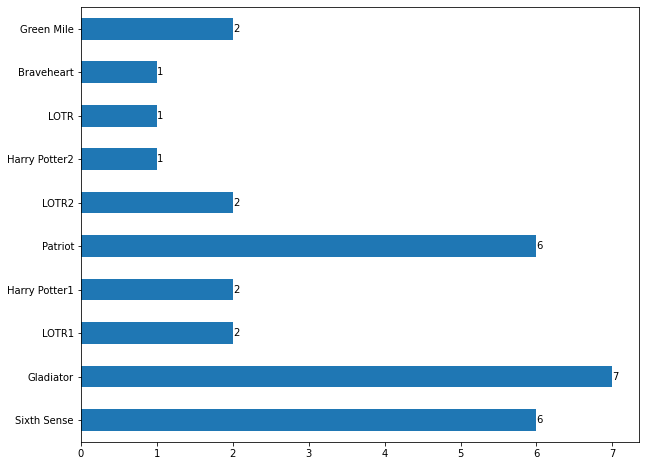

In [16]:
plt.figure(figsize=(10,8))
fig = df_sum.plot(kind='barh')
fig.bar_label(fig.containers[0],label_type='edge')
plt.show()

<AxesSubplot:ylabel='None'>

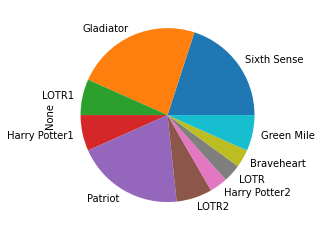

In [20]:
df_sum.plot(kind='pie')

In [21]:
s1 = pd.DataFrame(df.sum()/df.shape[0],columns=['Support']).sort_values('Support',ascending=False)

In [22]:
s1

,Support
Gladiator,0.7
Sixth Sense,0.6
Patriot,0.6
LOTR1,0.2
Harry Potter1,0.2
LOTR2,0.2
Green Mile,0.2
Harry Potter2,0.1
LOTR,0.1
Braveheart,0.1


In [23]:
#setting different min threshold for support

In [24]:
s1[s1['Support']>=0.1]

,Support
Gladiator,0.7
Sixth Sense,0.6
Patriot,0.6
LOTR1,0.2
Harry Potter1,0.2
LOTR2,0.2
Green Mile,0.2
Harry Potter2,0.1
LOTR,0.1
Braveheart,0.1


In [25]:
s1[s1['Support']>=0.2]

,Support
Gladiator,0.7
Sixth Sense,0.6
Patriot,0.6
LOTR1,0.2
Harry Potter1,0.2
LOTR2,0.2
Green Mile,0.2


In [26]:
s1[s1['Support']>=0.3]

,Support
Gladiator,0.7
Sixth Sense,0.6
Patriot,0.6


In [27]:
#different combination of items with length 2 and finding the support values

In [28]:
from itertools import combinations

In [29]:
s2 = list(combinations(s1.index,2))

In [30]:
s2 = [list(i) for i in s2]

In [31]:
s2

[['Gladiator', 'Sixth Sense'],
 ['Gladiator', 'Patriot'],
 ['Gladiator', 'LOTR1'],
 ['Gladiator', 'Harry Potter1'],
 ['Gladiator', 'LOTR2'],
 ['Gladiator', 'Green Mile'],
 ['Gladiator', 'Harry Potter2'],
 ['Gladiator', 'LOTR'],
 ['Gladiator', 'Braveheart'],
 ['Sixth Sense', 'Patriot'],
 ['Sixth Sense', 'LOTR1'],
 ['Sixth Sense', 'Harry Potter1'],
 ['Sixth Sense', 'LOTR2'],
 ['Sixth Sense', 'Green Mile'],
 ['Sixth Sense', 'Harry Potter2'],
 ['Sixth Sense', 'LOTR'],
 ['Sixth Sense', 'Braveheart'],
 ['Patriot', 'LOTR1'],
 ['Patriot', 'Harry Potter1'],
 ['Patriot', 'LOTR2'],
 ['Patriot', 'Green Mile'],
 ['Patriot', 'Harry Potter2'],
 ['Patriot', 'LOTR'],
 ['Patriot', 'Braveheart'],
 ['LOTR1', 'Harry Potter1'],
 ['LOTR1', 'LOTR2'],
 ['LOTR1', 'Green Mile'],
 ['LOTR1', 'Harry Potter2'],
 ['LOTR1', 'LOTR'],
 ['LOTR1', 'Braveheart'],
 ['Harry Potter1', 'LOTR2'],
 ['Harry Potter1', 'Green Mile'],
 ['Harry Potter1', 'Harry Potter2'],
 ['Harry Potter1', 'LOTR'],
 ['Harry Potter1', 'Braveheart'],


In [32]:
support1 = []
for i in range(0,len(s2)):
    sum2 = df.T.loc[s2[i]].sum()
    sum2 = len(sum2[sum2==df.T.loc[s2[i]].shape[0]])/df.shape[0]
    support1.append(sum2)

In [33]:
df_s2 = pd.DataFrame(support1,columns=['Support'])
df_s2['index'] = [tuple(i) for i in s2]
df_s2['length'] = df_s2['index'].apply(lambda x:len(x))
df_s2 = df_s2.set_index('index').sort_values('Support',ascending=False)

In [34]:
df_s2

,Support,length
index,,
"(Gladiator, Patriot)",0.6,2
"(Gladiator, Sixth Sense)",0.5,2
"(Sixth Sense, Patriot)",0.4,2
"(Sixth Sense, Green Mile)",0.2,2
"(LOTR1, LOTR2)",0.2,2
"(Harry Potter1, Harry Potter2)",0.1,2
"(LOTR1, Green Mile)",0.1,2
"(LOTR1, Harry Potter1)",0.1,2
"(Patriot, Braveheart)",0.1,2


In [35]:
df_s2[df_s2.Support>=0.1]

,Support,length
index,,
"(Gladiator, Patriot)",0.6,2
"(Gladiator, Sixth Sense)",0.5,2
"(Sixth Sense, Patriot)",0.4,2
"(Sixth Sense, Green Mile)",0.2,2
"(LOTR1, LOTR2)",0.2,2
"(Harry Potter1, Harry Potter2)",0.1,2
"(LOTR1, Green Mile)",0.1,2
"(LOTR1, Harry Potter1)",0.1,2
"(Patriot, Braveheart)",0.1,2


In [36]:
df_s2[df_s2.Support>=0.3]

,Support,length
index,,
"(Gladiator, Patriot)",0.6,2
"(Gladiator, Sixth Sense)",0.5,2
"(Sixth Sense, Patriot)",0.4,2


In [37]:
s3 = list(combinations(s1.index,3))
s3

[('Gladiator', 'Sixth Sense', 'Patriot'),
 ('Gladiator', 'Sixth Sense', 'LOTR1'),
 ('Gladiator', 'Sixth Sense', 'Harry Potter1'),
 ('Gladiator', 'Sixth Sense', 'LOTR2'),
 ('Gladiator', 'Sixth Sense', 'Green Mile'),
 ('Gladiator', 'Sixth Sense', 'Harry Potter2'),
 ('Gladiator', 'Sixth Sense', 'LOTR'),
 ('Gladiator', 'Sixth Sense', 'Braveheart'),
 ('Gladiator', 'Patriot', 'LOTR1'),
 ('Gladiator', 'Patriot', 'Harry Potter1'),
 ('Gladiator', 'Patriot', 'LOTR2'),
 ('Gladiator', 'Patriot', 'Green Mile'),
 ('Gladiator', 'Patriot', 'Harry Potter2'),
 ('Gladiator', 'Patriot', 'LOTR'),
 ('Gladiator', 'Patriot', 'Braveheart'),
 ('Gladiator', 'LOTR1', 'Harry Potter1'),
 ('Gladiator', 'LOTR1', 'LOTR2'),
 ('Gladiator', 'LOTR1', 'Green Mile'),
 ('Gladiator', 'LOTR1', 'Harry Potter2'),
 ('Gladiator', 'LOTR1', 'LOTR'),
 ('Gladiator', 'LOTR1', 'Braveheart'),
 ('Gladiator', 'Harry Potter1', 'LOTR2'),
 ('Gladiator', 'Harry Potter1', 'Green Mile'),
 ('Gladiator', 'Harry Potter1', 'Harry Potter2'),
 ('Gladi

In [38]:
s3 = [list(i) for i in s3]

In [39]:
support2 = []
for i in range(0,len(s3)):
    sum3 = df.T.loc[s3[i]].sum()
    sum3 = len(sum3[sum3==df.T.loc[s3[i]].shape[0]])/df.shape[0]
    support2.append(sum3)

In [40]:
df_s3 = pd.DataFrame(support2,columns=['Support'])
df_s3['index'] = [tuple(i) for i in s3]
df_s3['length'] = df_s3['index'].apply(lambda x:len(x))
df_s3 = df_s3.set_index('index').sort_values('Support',ascending=False)

In [41]:
df_s3

,Support,length
index,,
"(Gladiator, Sixth Sense, Patriot)",0.4,3
"(Sixth Sense, LOTR2, Green Mile)",0.1,3
"(LOTR1, Harry Potter1, Green Mile)",0.1,3
"(Gladiator, Green Mile, LOTR)",0.1,3
"(LOTR1, Harry Potter1, LOTR2)",0.1,3
...,...,...
"(Sixth Sense, Patriot, Harry Potter1)",0.0,3
"(Sixth Sense, Patriot, LOTR1)",0.0,3
"(Gladiator, LOTR, Braveheart)",0.0,3


In [43]:
df_s3[df_s3.Support>=0.1]

,Support,length
index,,
"(Gladiator, Sixth Sense, Patriot)",0.4,3
"(Sixth Sense, LOTR2, Green Mile)",0.1,3
"(LOTR1, Harry Potter1, Green Mile)",0.1,3
"(Gladiator, Green Mile, LOTR)",0.1,3
"(LOTR1, Harry Potter1, LOTR2)",0.1,3
"(Sixth Sense, LOTR1, Harry Potter1)",0.1,3
"(Sixth Sense, LOTR1, LOTR2)",0.1,3
"(Sixth Sense, LOTR1, Green Mile)",0.1,3
"(Harry Potter1, LOTR2, Green Mile)",0.1,3


In [44]:
from mlxtend.frequent_patterns import apriori,association_rules

In [45]:
#Frequent items of length 1 and min_support 0.1 and confidence=0.3

In [46]:
freq_items = apriori(df,min_support=0.1,use_colnames=True)
freq_items

C:\Users\lokit\anaconda3\anaconda\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


In [47]:
a_r = association_rules(freq_items,metric='confidence',min_threshold=0.3)
a_r

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4,0.533333
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.400000
2,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.8,-0.200000
3,(Harry Potter1),(Sixth Sense),0.2,0.6,0.1,0.500000,0.833333,-0.02,0.8,-0.200000
4,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
...,...,...,...,...,...,...,...,...,...,...
212,"(Green Mile, LOTR2)","(LOTR1, Harry Potter1, Sixth Sense)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf,1.000000
213,(LOTR1),"(Green Mile, Harry Potter1, Sixth Sense, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8,1.000000
214,(Harry Potter1),"(LOTR1, Sixth Sense, LOTR2, Green Mile)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8,1.000000
215,(Green Mile),"(LOTR1, Harry Potter1, Sixth Sense, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8,1.000000


In [48]:
a_r.sort_values('lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
126,"(LOTR1, Harry Potter1)","(Sixth Sense, LOTR2)",0.1,0.1,0.1,1.0,10.000000,0.09,inf,1.000000
181,"(LOTR1, Harry Potter1)","(Green Mile, LOTR2)",0.1,0.1,0.1,1.0,10.000000,0.09,inf,1.000000
168,"(Harry Potter1, Sixth Sense)","(Green Mile, LOTR2)",0.1,0.1,0.1,1.0,10.000000,0.09,inf,1.000000
155,"(LOTR1, Sixth Sense)","(Green Mile, LOTR2)",0.1,0.1,0.1,1.0,10.000000,0.09,inf,1.000000
156,"(Sixth Sense, LOTR2)","(Green Mile, LOTR1)",0.1,0.1,0.1,1.0,10.000000,0.09,inf,1.000000
...,...,...,...,...,...,...,...,...,...,...
6,(LOTR2),(Sixth Sense),0.2,0.6,0.1,0.5,0.833333,-0.02,0.8,-0.200000
3,(Harry Potter1),(Sixth Sense),0.2,0.6,0.1,0.5,0.833333,-0.02,0.8,-0.200000
2,(LOTR1),(Sixth Sense),0.2,0.6,0.1,0.5,0.833333,-0.02,0.8,-0.200000
14,(Green Mile),(Gladiator),0.2,0.7,0.1,0.5,0.714286,-0.04,0.6,-0.333333


In [49]:
a_r[a_r['lift']>1]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4,0.533333
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.400000
4,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
5,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
7,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.000000,1.666667,0.04,inf,0.444444
...,...,...,...,...,...,...,...,...,...,...
212,"(Green Mile, LOTR2)","(LOTR1, Harry Potter1, Sixth Sense)",0.1,0.1,0.1,1.000000,10.000000,0.09,inf,1.000000
213,(LOTR1),"(Green Mile, Harry Potter1, Sixth Sense, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8,1.000000
214,(Harry Potter1),"(LOTR1, Sixth Sense, LOTR2, Green Mile)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8,1.000000
215,(Green Mile),"(LOTR1, Harry Potter1, Sixth Sense, LOTR2)",0.2,0.1,0.1,0.500000,5.000000,0.08,1.8,1.000000


In [50]:
#visualization of rules

<AxesSubplot:xlabel='support', ylabel='confidence'>

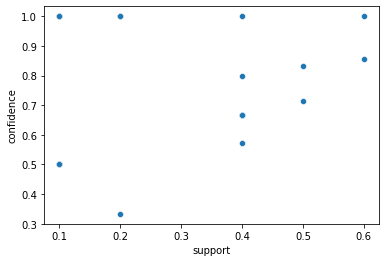

In [51]:
sns.scatterplot(x=a_r['support'],y=a_r['confidence'])

<AxesSubplot:xlabel='support', ylabel='confidence'>

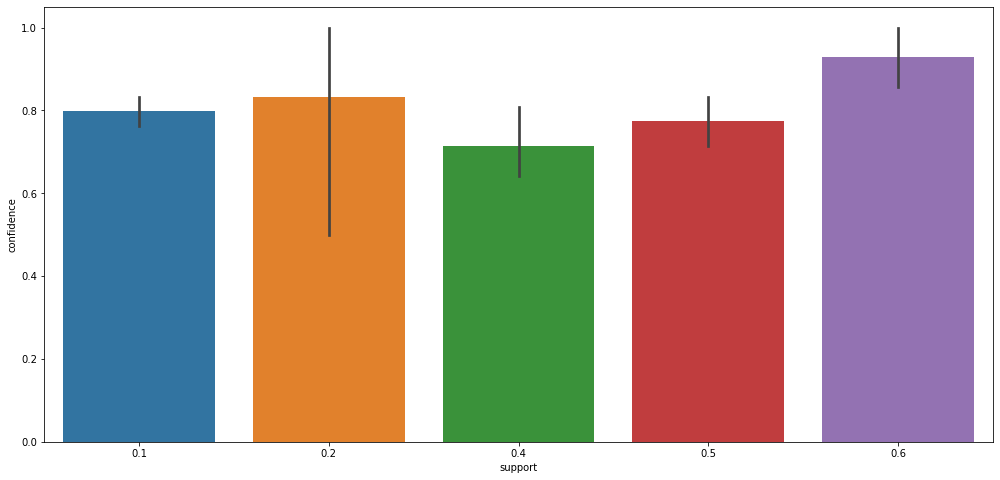

In [52]:
plt.figure(figsize=(17,8))
sns.barplot(x=a_r['support'],y=a_r['confidence'])

In [53]:
from wordcloud import WordCloud


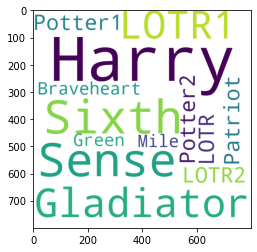

In [54]:
wc =  WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(str(df))
plt.imshow(wc)

In [55]:
#Frequent items of length 1 and min_support 0.15 and confidence=0.4

In [56]:
freq_items1 = apriori(df,min_support=0.15,use_colnames=True)
freq_items1

C:\Users\lokit\anaconda3\anaconda\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.2,(Green Mile)
7,0.5,"(Gladiator, Sixth Sense)"
8,0.4,"(Patriot, Sixth Sense)"
9,0.2,"(Green Mile, Sixth Sense)"


In [57]:
a_r1 = association_rules(freq_items1,metric='confidence',min_threshold=0.4)
a_r1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4,0.533333
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.400000
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf,0.500000
5,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf,0.750000
6,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.000000
7,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.000000
8,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.000000
9,"(Sixth Sense, Gladiator)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0,0.500000


In [58]:
a_r1.sort_values('lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
7,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.000000
8,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.000000
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf,0.500000
6,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.000000
5,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf,0.750000
11,"(Patriot, Sixth Sense)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf,0.500000
12,(Gladiator),"(Patriot, Sixth Sense)",0.7,0.4,0.4,0.571429,1.428571,0.12,1.4,1.000000
9,"(Sixth Sense, Gladiator)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0,0.500000
14,(Patriot),"(Sixth Sense, Gladiator)",0.6,0.5,0.4,0.666667,1.333333,0.10,1.5,0.625000
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.400000


<AxesSubplot:xlabel='support', ylabel='confidence'>

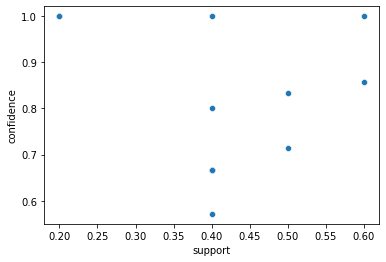

In [59]:
sns.scatterplot(x=a_r1['support'],y=a_r1['confidence'])

<AxesSubplot:xlabel='support', ylabel='confidence'>

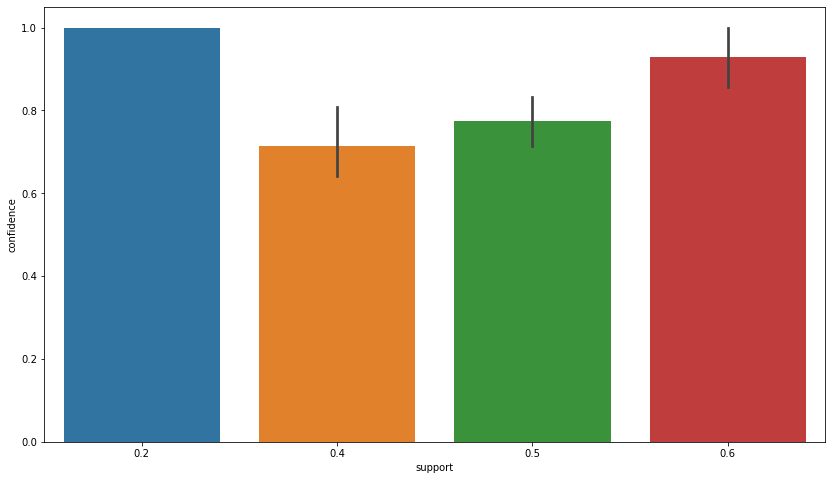

In [60]:
plt.figure(figsize=(14,8))
sns.barplot(x=a_r1['support'],y=a_r1['confidence'])

In [61]:
#0.2 support and 0.6 confidence

In [62]:
freq_items2 = apriori(df,min_support=0.2,use_colnames=True)
freq_items2

C:\Users\lokit\anaconda3\anaconda\lib\site-packages\mlxtend\frequent_patterns\fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.2,(Green Mile)
7,0.5,"(Gladiator, Sixth Sense)"
8,0.4,"(Patriot, Sixth Sense)"
9,0.2,"(Green Mile, Sixth Sense)"


In [63]:
a_r2 = association_rules(freq_items2,metric='confidence',min_threshold=0.6)
a_r2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4,0.533333
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.400000
2,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
3,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2,0.250000
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf,0.500000
5,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf,0.750000
6,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.000000
7,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.000000
8,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.000000
9,"(Sixth Sense, Gladiator)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0,0.500000


In [64]:
a_r2.sort_values('lift',ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
7,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.000000
8,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf,1.000000
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf,0.500000
6,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8,1.000000
5,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf,0.750000
11,"(Patriot, Sixth Sense)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf,0.500000
9,"(Sixth Sense, Gladiator)",(Patriot),0.5,0.6,0.4,0.800000,1.333333,0.10,2.0,0.500000
13,(Patriot),"(Sixth Sense, Gladiator)",0.6,0.5,0.4,0.666667,1.333333,0.10,1.5,0.625000
1,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8,0.400000
0,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4,0.533333


<AxesSubplot:xlabel='support', ylabel='confidence'>

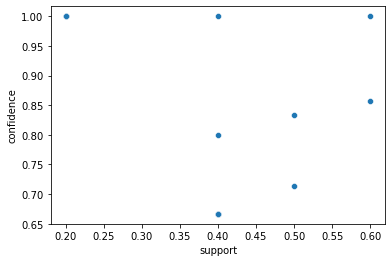

In [65]:
sns.scatterplot(x=a_r2['support'],y=a_r2['confidence'])

<AxesSubplot:xlabel='support', ylabel='confidence'>

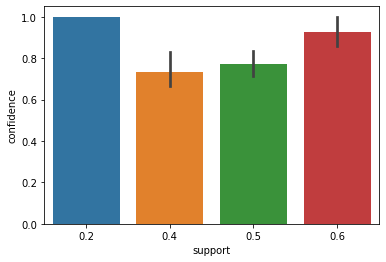

In [66]:

sns.barplot(x=a_r2['support'],y=a_r2['confidence'])